# 1. Preprocessing

In [1]:
# -------------------------
# 1. Import Libraries
# -------------------------

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import kagglehub
import missingno as msno
import ast
import folium
from IPython.display import display
from sklearn.linear_model import LinearRegression

In [2]:
# -------------------------
# 2. Load Data
# -------------------------

path = kagglehub.dataset_download("danieldvok280/airbnb-2024-combined-dataset")
file_name = "combined_dataset.csv"
full_path = os.path.join(path, file_name)

try:
    airbnb = pd.read_csv(full_path)
    display(airbnb.head())

except FileNotFoundError:
    print(f"⛔️ File not found: {full_path}")

id                         listing_url       scrape_id last_scraped  \
0  23163  https://www.airbnb.com/rooms/23163  20240325142220   2024-03-25   
1  23169  https://www.airbnb.com/rooms/23169  20240325142220   2024-03-25   
2  26755  https://www.airbnb.com/rooms/26755  20240325142220   2024-03-25   
3  30762  https://www.airbnb.com/rooms/30762  20240325142220   2024-03-25   
4  42514  https://www.airbnb.com/rooms/42514  20240325142220   2024-03-25   

        source                                               name  \
0  city scrape                       Residence Karolina - KAROL12   
1  city scrape                         Residence Masna - Masna302   
2  city scrape                  Central Prague Old Town Top Floor   
3  city scrape                          Residence Rybna - Rybna23   
4  city scrape  "NEWLY FURNISHED" 1BR near Pachtuv Palace,Old ...   

                                         description  \
0  Unique and elegant apartment rental in Prague,...   
1  Masna studio offers a lot of space and privacy...   
2  Big and beautiful new attic apartment in the v...   
3  We offer a modern, comfortable, serviced apart...   
4  *NEWLY* Furnished 1-bedroom apartment on the f...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  This apartment offers a fantastic location. Yo...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/01bbe32c-3f13...     5282  ...   
1  https://a0.muscache.com/pictures/b450cf2a-8561...     5282  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...   113902  ...   
3  https://a0.muscache.com/pictures/dfbb2fc2-91a0...     5282  ...   
4  https://a0.muscache.com/pictures/7f66bc43-25c7...   185641  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.96                   4.93                4.86   
1                        4.86                   4.97                4.69   
2                        4.96                   4.93                4.89   
3                        4.69                   4.94                4.50   
4                        4.84                   4.90                4.79   

  license instant_bookable calculated_host_listings_count  \
0     NaN                t                             70   
1     NaN                t                             70   
2     NaN                f                              3   
3     NaN                t                             70   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                          69   
1                                          69   
2                                           3   
3                                          69   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.18  
1                                           0              0.69  
2                                           0              3.32  
3                                           0              0.10  
4                                           0              2.01  

[5 rows x 75 columns]

In [3]:
# Display basic information

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11446 non-null  int64  
 1   listing_url                                   11446 non-null  object 
 2   scrape_id                                     11446 non-null  int64  
 3   last_scraped                                  11446 non-null  object 
 4   source                                        11446 non-null  object 
 5   name                                          11446 non-null  object 
 6   description                                   9276 non-null   object 
 7   neighborhood_overview                         5663 non-null   object 
 8   picture_url                                   11446 non-null  object 
 9   host_id                                       11446 non-null 

In [4]:
# Check for missing values in each column

missing_percentage = (airbnb.isnull().sum() / len(airbnb)) * 100
missing_percentage.sort_values(ascending=False)

license                                         100.000000
calendar_updated                                100.000000
neighbourhood_group_cleansed                    100.000000
neighbourhood                                    50.524201
neighborhood_overview                            50.524201
                                                   ...    
instant_bookable                                  0.000000
calculated_host_listings_count                    0.000000
calculated_host_listings_count_entire_homes       0.000000
calculated_host_listings_count_private_rooms      0.000000
calculated_host_listings_count_shared_rooms       0.000000
Length: 75, dtype: float64

<Axes: >

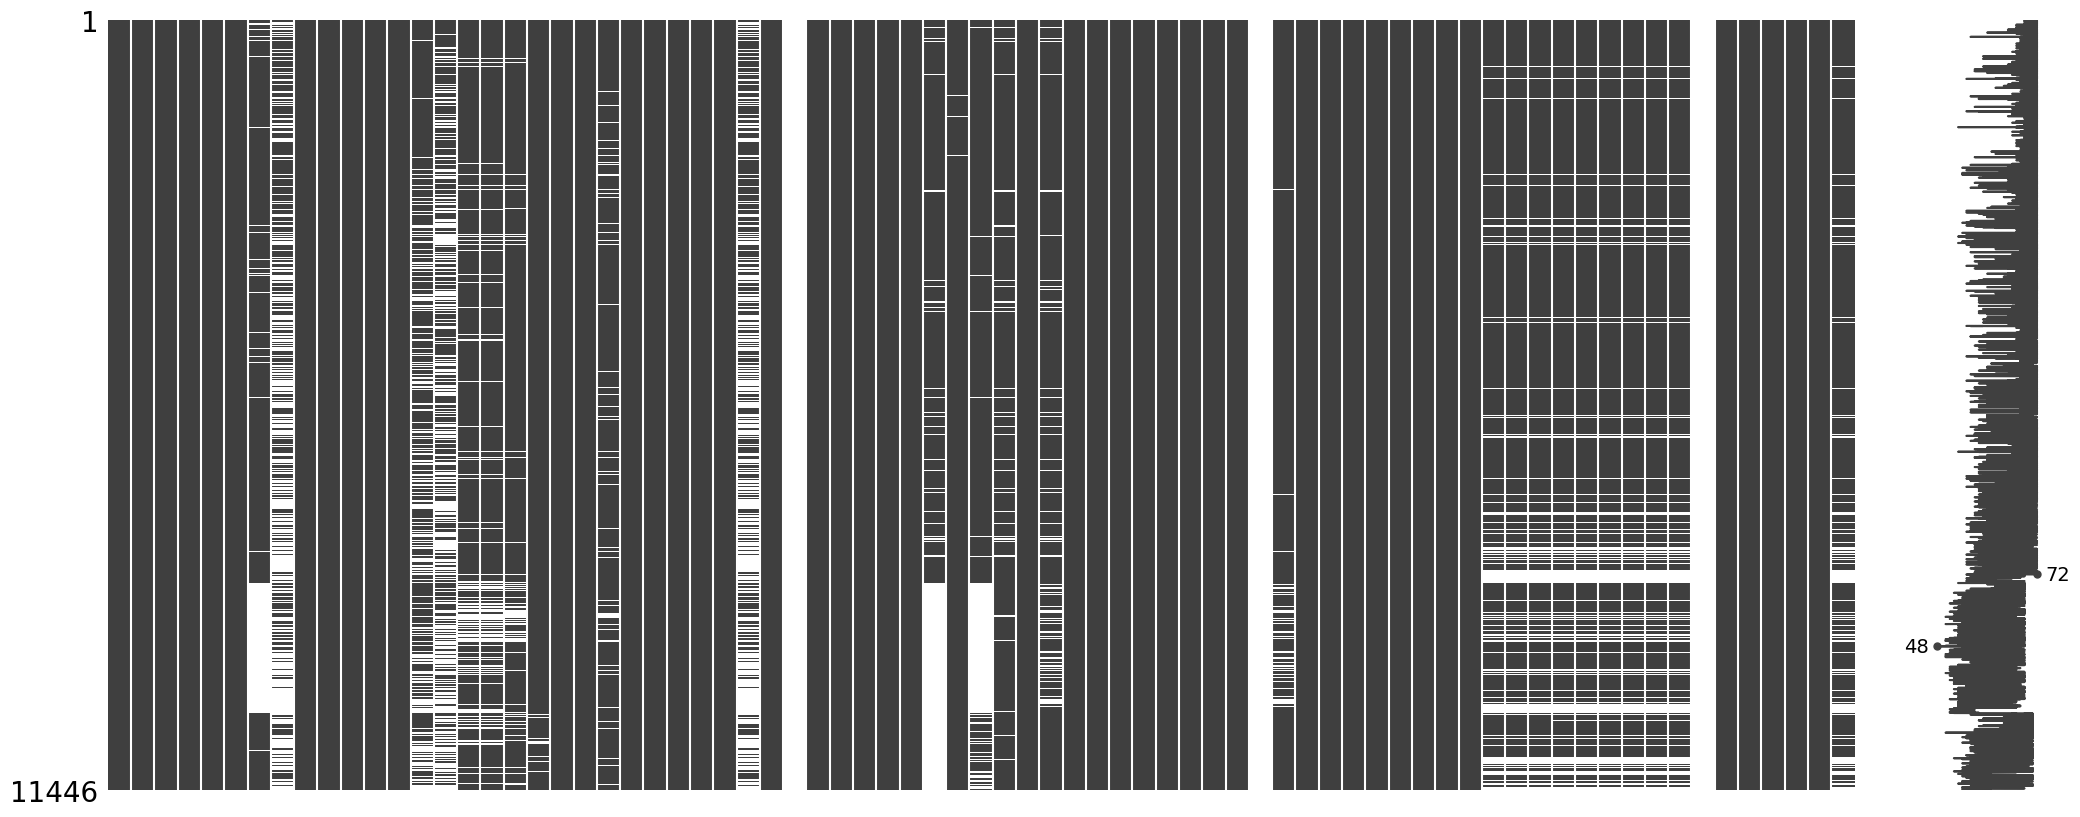

In [5]:
# Visualize missing values

msno.matrix(airbnb)

In [6]:
# -------------------------
# 3. Select necessary columns
# -------------------------

features = [

    # listing information
    'id', 'name', 'listing_url', 'description', 'room_type', 'accommodates', 'amenities',
    'bathrooms', 'bedrooms', 'beds',

    # location information
    'neighborhood_overview', 'neighbourhood_cleansed', 'latitude', 'longitude',

    # host information
    'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',

    # booking and price information
    'price', 'minimum_nights', 'maximum_nights', 'has_availability',
    'availability_30', 'availability_365', 'instant_bookable',

    # review and rating information
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'

            ]


In [7]:
df = airbnb[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11446 non-null  int64  
 1   name                         11446 non-null  object 
 2   listing_url                  11446 non-null  object 
 3   description                  9276 non-null   object 
 4   room_type                    11446 non-null  object 
 5   accommodates                 11446 non-null  int64  
 6   amenities                    11446 non-null  object 
 7   bathrooms                    8043 non-null   float64
 8   bedrooms                     9104 non-null   float64
 9   beds                         11027 non-null  float64
 10  neighborhood_overview        5663 non-null   object 
 11  neighbourhood_cleansed       11446 non-null  object 
 12  latitude                     11446 non-null  float64
 13  longitude       

In [8]:
# -------------------------
# 4. Convert data types
# -------------------------

# Convert 'price' from string to float
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype('float')

# Convert 'host_since' from string to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

# Convert 'host_response_rate' from string (%) to float
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].astype('float')

# Convert 'host_acceptance_rate' from string (%) to float
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype('float')

# Convert 'host_is_superhost' from string to boolean
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False}).astype('boolean')

# Convert 'host_has_profile_pic' from string to boolean
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False}).astype('boolean')

# Convert 'host_identity_verified' from string to boolean
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False}).astype('boolean')

# Convert 'has_availability' from string to boolean
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False}).astype('boolean')

# Convert 'instant_bookable' from string to boolean
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype('boolean')


C:\Users\toomu\AppData\Local\Temp\ipykernel_412\2698075394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('$', '')
C:\Users\toomu\AppData\Local\Temp\ipykernel_412\2698075394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(',', '')
C:\Users\toomu\AppData\Local\Temp\ipykernel_412\2698075394.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [9]:
# -------------------------
# 5. Remove missing values and outliers
# -------------------------

# Drop rows with missing values in 'host_is_superhost'
df.dropna(subset=['host_is_superhost'], inplace=True)

# Drop rows with missing values in 'price'
df.dropna(subset=['price'], inplace=True)

# Remove outliers: keep only listings with price <= 15,000
df = df[df['price'] <= 15000]

C:\Users\toomu\AppData\Local\Temp\ipykernel_412\3836537627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['host_is_superhost'], inplace=True)
C:\Users\toomu\AppData\Local\Temp\ipykernel_412\3836537627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['price'], inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10144 entries, 0 to 11445
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10144 non-null  int64         
 1   name                         10144 non-null  object        
 2   listing_url                  10144 non-null  object        
 3   description                  8603 non-null   object        
 4   room_type                    10144 non-null  object        
 5   accommodates                 10144 non-null  int64         
 6   amenities                    10144 non-null  object        
 7   bathrooms                    7907 non-null   float64       
 8   bedrooms                     8642 non-null   float64       
 9   beds                         10070 non-null  float64       
 10  neighborhood_overview        5187 non-null   object        
 11  neighbourhood_cleansed       10144 non-null  o

# 2. Create derived features

- host_duration: duration (in days) between the host’s signup date and January 1, 2025
- host_is_nearby: whether the host lives in Prague
- amenities_count: total number of amenities provided
- is_private: whether the listing is a private space
- booking_rate : booking rate for the next 30 days
- center_distance: distance from the listing to the nearest city center in Prague

In [11]:
# -------------------------
# 1. Create 'host_duration' column
# -------------------------

# Set the reference date (January 1, 2025)
reference_date = datetime.strptime("20250101", "%Y%m%d")

# Calculate how long each host has been active (in days)
df['host_duration'] = reference_date - df['host_since']

# Convert data type from datetime to int
df['host_duration'] = df['host_duration'].astype('str')
df['host_duration'] = df['host_duration'].str.replace(' days', '')
df['host_duration'] = df['host_duration'].astype('int')
df['host_duration'].head()

# Display the first few results
print(df[['host_since', 'host_duration']].head())

  host_since  host_duration
0 2008-12-17           5859
1 2008-12-17           5859
2 2010-04-26           5364
3 2008-12-17           5859
4 2010-07-30           5269


In [12]:
# -------------------------
# 2. Create 'host_is_nearby' column
# -------------------------

# Check unique values in the 'host_location' column
print(df['host_location'].unique())

['Prague, Czechia' 'Saint Moritz, Switzerland' 'Tunis, Tunisia'
 'London, United Kingdom' 'Milan, Italy' nan 'Milovice, Czechia'
 'Aberystwyth, United Kingdom' 'Central Bohemian Region, Czechia'
 'Hlavní město Praha, Czechia' 'Zagreb, Croatia' 'Italy'
 'Tel Aviv, Israel' 'Bourg-Saint-Maurice, France' 'Czechia'
 'Oxford, United Kingdom' 'Novosibirsk, Russia' 'Germany' 'Boulder, CO'
 'Asker, Norway' 'Sachsenheim, Germany' 'Rancho Santa Fe, CA'
 'Seoul, South Korea' 'Los Angeles, CA' 'Dubai, United Arab Emirates'
 'Amsterdam, Netherlands' 'Liberec, Czechia' 'Arlington, VA'
 'Kamenice, Czechia' 'Annecy, France' 'Moscow, Russia'
 'Mnichovice, Czechia' 'Münsterlingen, Switzerland' 'Lety, Czechia'
 'Kadaň, Czechia' 'Kladno, Czechia' 'Zlin, Czechia' 'Beřovice, Czechia'
 'England, United Kingdom' 'Libochovice, Czechia'
 'Braunau am Inn, Austria' 'Jesenice, Czechia' 'Caledon, Canada'
 'Martin, Slovakia' 'Tbilisi, Georgia' 'Vienna, Austria' 'Praha, Czechia'
 'Cairo, Egypt' 'Zürich, Switzerland'
 

In [13]:
# Define a list of location values that represent districts within Prague
praha_locations = [
    "Prague, Czechia",
    "Hlavní město Praha, Czechia",
    "Praha, Czechia",
    "Praha 11, Czechia",
    "Prague 9, Czechia"
]

# Assign True if the host's location matches any of the Prague districts
df["host_is_nearby"] = df["host_location"].isin(praha_locations).astype(bool)

# Display the first few results
print(df[["host_location", "host_is_nearby"]].head())

               host_location  host_is_nearby
0            Prague, Czechia            True
1            Prague, Czechia            True
2            Prague, Czechia            True
3            Prague, Czechia            True
4  Saint Moritz, Switzerland           False


In [14]:
# -------------------------
# 3. Create 'amenities_count' column
# -------------------------

# Convert the 'amenities' column from string format to a Python list
df["amenities"] = df["amenities"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Calculate the number of amenities for each listing
df["amenities_count"] = df["amenities"].apply(len)

# Display the first few results
df[["amenities", "amenities_count"]].head()

amenities  amenities_count
0  [Hair dryer, Carbon monoxide alarm, Dedicated ...               30
1  [Hair dryer, Carbon monoxide alarm, Dedicated ...               28
2  [Hair dryer, Free washer – In unit, Carbon mon...               58
3  [Hair dryer, Carbon monoxide alarm, Shampoo, S...               27
4  [Hair dryer, Carbon monoxide alarm, Dedicated ...               32

In [15]:
# -------------------------
# 4. Create 'is_private' column
# -------------------------

# Define a dictionary to classify room types by privacy level
private_space = {
    'Entire home/apt': True,
    'Hotel room': True,
    'Private room': False,
    'Shared room': False
}

# Create a new column indicating whether the space is private or not
df['is_private'] = df['room_type'].map(private_space).astype(bool)

# Display the first few results
df[['room_type', 'is_private']].head()

room_type  is_private
0  Entire home/apt        True
1  Entire home/apt        True
2  Entire home/apt        True
3  Entire home/apt        True
4  Entire home/apt        True

In [16]:
# -------------------------
# 5. Create 'booking_rate' column
# -------------------------

# Compute the proportion of booked nights within the next 30 days
df['booking_rate'] = 1 - (df['availability_30'] / 30)

# Display the first few results
df[['availability_30', 'booking_rate']].head()

availability_30  booking_rate
0               29      0.033333
1               18      0.400000
2                4      0.866667
3               20      0.333333
4               26      0.133333

In [17]:
# -------------------------
# 6. Create 'center_distance' column
# -------------------------

# Define the coordinates (latitude, longitude) of four main landmarks in Prague
centers = {
    "Old Town Square": (50.087, 14.420),
    "Wenceslas Square": (50.081, 14.425),
    "Lennon Wall": (50.086, 14.408),
    "Dancing House": (50.075, 14.414),
    "Prague Castle": (50.090, 14.400),
    "Charles Bridge": (50.086, 14.411),
    "Main Train Station": (50.083, 14.436),
    "Vaclav Havel Airport": (50.100, 14.266)
}

# Define the Haversine function to calculate the shortest distance (in km) between two points on Earth
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# Define a function to calculate the distance from each listing to the nearest city center
def assign_center(df):
    # Compute distances to each center
    for center_name, (clat, clon) in centers.items():
        df[f"dist_{center_name}"] = haversine(df["latitude"], df["longitude"], clat, clon)

    # Identify the closest center and its distance
    dist_cols = [f"dist_{c}" for c in centers.keys()]
    df["nearest_center"] = df[dist_cols].idxmin(axis=1).str.replace("dist_", "")
    df["center_distance"] = df[dist_cols].min(axis=1)

    return df

# Apply the function
df = assign_center(df)

# Remove unnecessary columns used for distance calculation
dist_cols = [f"dist_{c}" for c in centers.keys()]
df = df.drop(columns=dist_cols)

# Display the first few results
print(df[["latitude", "longitude", "nearest_center", "center_distance"]].head())

   latitude  longitude      nearest_center  center_distance
0  50.08229   14.41552      Charles Bridge         0.523631
1  50.08830   14.42272     Old Town Square         0.241979
2  50.08729   14.43179  Main Train Station         0.563719
3  50.08821   14.42623     Old Town Square         0.464393
4  50.08228   14.41345      Charles Bridge         0.449065


In [18]:
# Visualize listings on the map
praha_center = [50.083, 14.42]  # set the center location of Prague
m = folium.Map(location=praha_center, zoom_start=13)

for center_name, (clat, clon) in centers.items():
    folium.Marker(
        location=[clat, clon],
        popup=center_name,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

colors = {
    "Old Town Square": "red",
    "Wenceslas Square": "orange",
    "Lennon Wall": "yellow",
    "Dancing House": "green",
    "Prague Castle": "blue",
    "Charles Bridge": "darkblue",
    "Main Train Station": "purple",
    "Vaclav Havel Airport": "cadetblue"
}

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color=colors.get(row["nearest_center"], "gray"),
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

display(m)

In [19]:
# -------------------------
# 6. Export CSV file
# -------------------------

# Save the cleaned dataset to the 'datasets' folder
df.to_csv('../datasets/airbnb_listings_prague_2024.csv', index=False)

# 3. EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10144 entries, 0 to 11445
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10144 non-null  int64         
 1   name                         10144 non-null  object        
 2   listing_url                  10144 non-null  object        
 3   description                  8603 non-null   object        
 4   room_type                    10144 non-null  object        
 5   accommodates                 10144 non-null  int64         
 6   amenities                    10144 non-null  object        
 7   bathrooms                    7907 non-null   float64       
 8   bedrooms                     8642 non-null   float64       
 9   beds                         10070 non-null  float64       
 10  neighborhood_overview        5187 non-null   object        
 11  neighbourhood_cleansed       10144 non-null  o

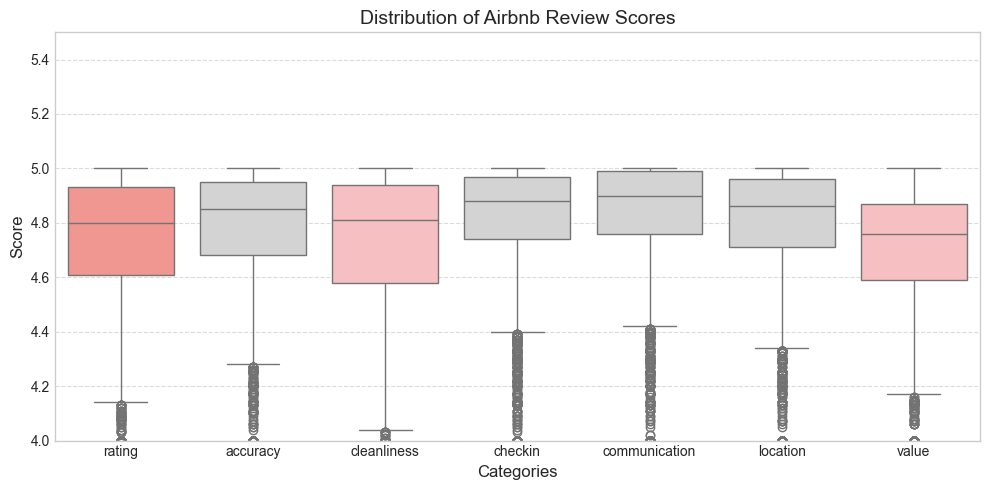

In [21]:
# -------------------------
# 1. Distribution of review scores
# -------------------------

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 5))

scores = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

labels = [i.split('_')[2] for i in scores]

# --- Custom color palette ---
colors = []
for label in labels:
    if label == 'rating':
        colors.append('#ff8980')      # red
    elif label in ['cleanliness', 'value']:
        colors.append('#ffb6b9')      # pink
    else:
        colors.append('#d3d3d3')      # gray

# Create the boxplot
sns.boxplot(data=df[scores], palette=colors)

# Add titles and labels
plt.title('Distribution of Airbnb Review Scores', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.ylim(4.0, 5.5)
plt.xticks(ticks=range(len(labels)), labels=labels)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\toomu\AppData\Local\Temp\ipykernel_412\1929526977.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


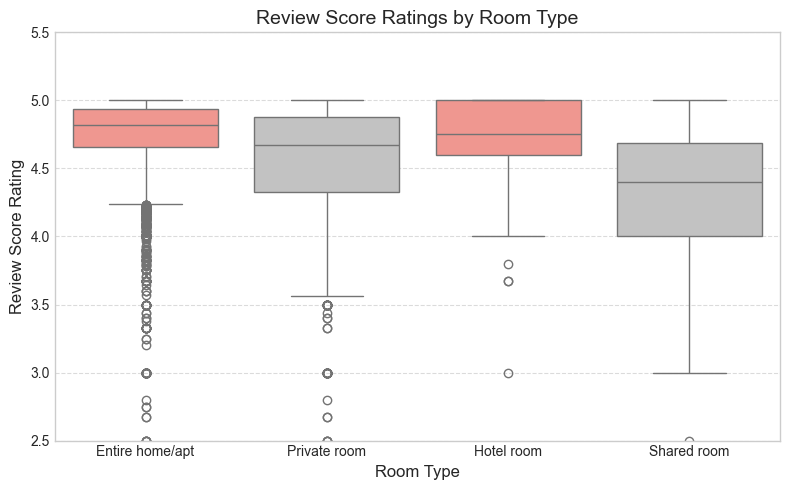

In [22]:
# -------------------------
# 2. Review score ratings by room type
# -------------------------

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 5))

# Define the highlight categories
highlight_rooms = ['Entire home/apt', 'Hotel room']

# Create a custom palette: red for highlighted rooms, gray for others
palette = {
    room: '#ff8980' if room in highlight_rooms else '#c2c2c2'
    for room in df['room_type'].unique()
}

# Plot the boxplot
sns.boxplot(
    data=df,
    x='room_type',
    y='review_scores_rating',
    palette=palette
)

# Add titles and labels
plt.title('Review Score Ratings by Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Review Score Rating', fontsize=12)
plt.ylim(2.5, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


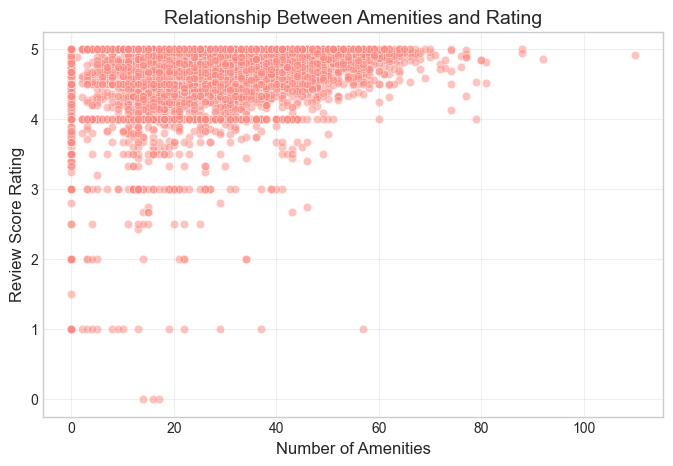

In [23]:
# -------------------------
# 3. Relationship between the number of amenities and rating
# -------------------------

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='amenities_count',
    y='review_scores_rating',
    alpha=0.5,
    color='#ff8980'
)

plt.title('Relationship Between Amenities and Rating', fontsize=14)
plt.xlabel('Number of Amenities', fontsize=12)
plt.ylabel('Review Score Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

C:\Users\toomu\AppData\Local\Temp\ipykernel_412\3770115819.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


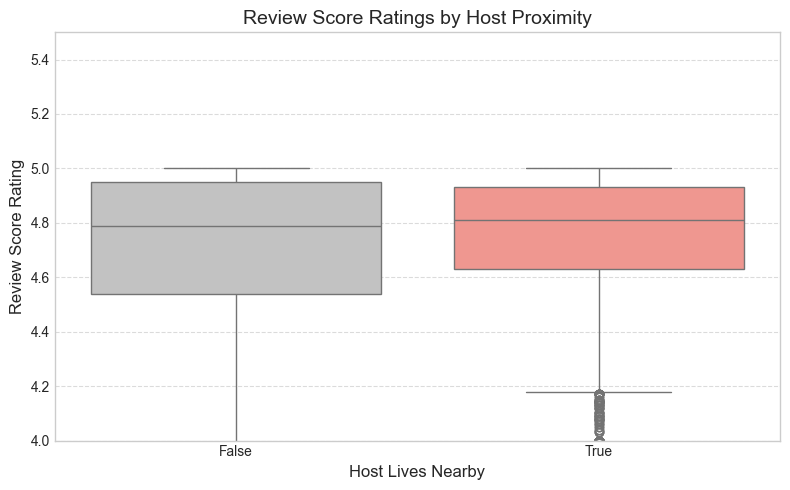

In [24]:
# -------------------------
# 4. Review score ratings by whether the host lives nearby
# -------------------------

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 5))

# Define custom colors for True (red) and False (gray)
palette = {'True': '#ff8980', 'False': '#c2c2c2'}

# Create the boxplot
sns.boxplot(
    data=df,
    x='host_is_nearby',
    y='review_scores_rating',
    palette=palette
)

# Add titles and labels
plt.title('Review Score Ratings by Host Proximity', fontsize=14)
plt.xlabel('Host Lives Nearby', fontsize=12)
plt.ylabel('Review Score Rating', fontsize=12)
plt.ylim(4.0, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



R² Score: 0.8478386758253356


C:\Users\toomu\AppData\Local\Temp\ipykernel_412\3890159043.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


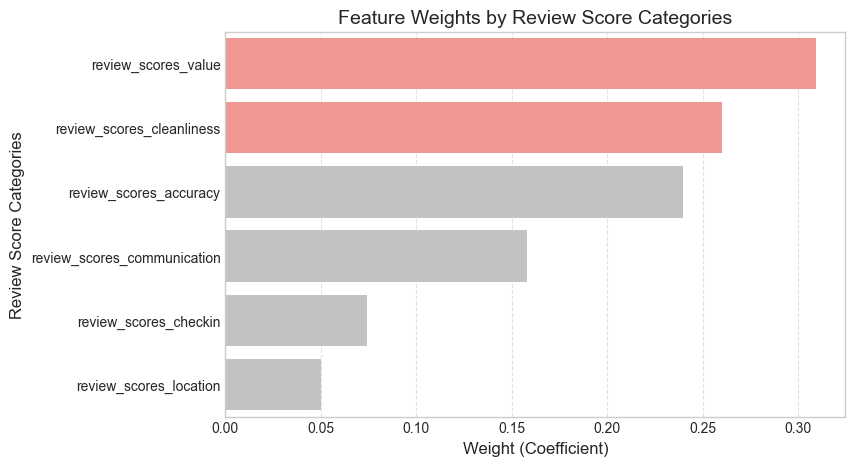

In [25]:
# -------------------------
# 5. Calculate feature weights using Linear Regression
# -------------------------

# Define independent(X) and dependent(y) variables
X = df[scores].dropna().drop(columns=["review_scores_rating"])
y = df[scores].dropna()["review_scores_rating"]

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients (weights)
coef = pd.Series(model.coef_, index=X.columns)

# Display R² score
print("\nR² Score:", model.score(X, y))

colors = ['#ff8980' if i < 2 else '#c2c2c2' for i in range(len(coef))]

# Visualize feature weights 
plt.figure(figsize=(8, 5))
sns.barplot(
    x=coef.sort_values(ascending=False).values,
    y=coef.sort_values(ascending=False).index,
    palette=colors
)

plt.title("Feature Weights by Review Score Categories", fontsize=14)
plt.xlabel("Weight (Coefficient)", fontsize=12)
plt.ylabel("Review Score Categories", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()